<a href="https://colab.research.google.com/github/GuptaRitik/Ted-talk-views-prediction/blob/main/TEDx_talks_views_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over
4,000 TED talks including transcripts in many languages.
Founded in 1984 by Richard Salman as a nonprofit organization
that aimed at bringing experts from the fields of Technology, Entertainment, and Design
together, TED Conferences have gone on to become the Mecca of ideas from virtually all
walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000
talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore,
Jimmy Wales, Shahrukh Khan, and Bill Gates.
The main objective is to build a predictive model, which could help in predicting the views of
the videos uploaded on the TEDx website.

#### This is the Regression problem as we need to predict Views (continous values), and there are various algorithm available which we are trying to model and choose the optimal model.  


## Overview of Data Attributes 

Attribute - Description

* talk_id - Talk identification number provided by TED


* title - Title of the talk string

* speaker_1 - First speaker in TED's speaker list

* speakers - Speakers in the talk 

* occupations - *Occupations of the speakers


* about_speakers - *Blurb about each
speaker


* recorded_date - Date the talk was
recorded



* published_date - Date the talk was
published to TED.com


* event - Event or medium in
which the talk was given



* native_lang - Language the talk was
given in



* available_lang - All available languages
(lang_code) for a talk


* comments - Count of comments 

* duration - Duration in seconds 

* topics - Related tags or topics
for the talk


* related_talks - Related talks
(key='talk_id',
value='title')


* url - URL of the talk 

* description - Description of the talk 

* transcript - Full transcript of the talk 


* **views -  Count of views (Target Variable)**

# Goal:- 

### Analysing the data, providing insights and build a predictive ML model to predict the views for any given data of videos. 

## Process towards Goal:-

* Importing necessary libraries (for Model building we're gonna  use scikit-learn)
* Importing dataset
* Data processing for EDA
* Exploratory data analysis
* Deriving insights and short conclusions
* Data Cleaning/Null value/missing value treatment 
* Feature engineering
* Data preprocessing
* Model building
* Hyperparameter tuning
* Comparision and selection of model
* conclusion

## Importing Libraries

In [200]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [201]:
# Data and EDA libraries
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from wordcloud import WordCloud
import squarify 
import math
%matplotlib inline

# Machine Learning libraries
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
import time
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble
from sklearn.impute import KNNImputer

## Data Importing

In [202]:
df = pd.read_csv('/content/drive/MyDrive/Capstones/Data/ML-Regression/data_ted_talks.csv')
df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.000000,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.000000,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.000000,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.000000,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.000000,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


### Overview before EDA

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [204]:
df.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

### Data processing for EDA

Some of the features has null values, we can try checking each column for more details along with EDA

We found that **speaker_1** and **all_speaker** has same names, so its better if we can drop that since it not impacting our EDA and model.

In [205]:
# Dropping the all speaker column.

df.drop('all_speakers', axis=1, inplace=True)

Occupation has values as the key value pair, to perform better in EDA we have to convert this in the simple form.

In [206]:
# using eval to remove the external string to operate in dictionary inside it
df['occupations'] = df['occupations'].apply(lambda x: eval(x) if type(x) == str else 0)

# using the key, getting the names inside the dictionary, else setting as NaN
df['occupations'] = df['occupations'].apply(lambda x: x[0][0] if type(x) == dict else np.nan)


df['occupations'].head(3)

0                        climate advocate
1    global health expert; data visionary
2                    technology columnist
Name: occupations, dtype: object

#### Formating and transforming the irregularities in features

In [207]:
# applying "to datetime" function to convert string to date
df[['recorded_date', 'published_date']]	 = df[['recorded_date', 'published_date']].apply(pd.to_datetime)

# only assigning 2 values TEDx and TEd for relevant event
df['event'] = df['event'].apply(lambda x: 'TEDx' if 'TEDx' in x else 'TED')


# using Eval function to convert sring of list into list for proper EDA
df['available_lang'] = df['available_lang'].apply(lambda x: eval(x))

df['topics'] = df['topics'].apply(lambda x: eval(x))



# Exploratory Data Analysis

#### Statistical overview of the numerical features in data

In [208]:
pd.set_option('float_format', '{:f}'.format)
df.describe()

,talk_id,views,comments,duration
count,4005.000000,4005.000000,3350.000000,4005.000000
mean,12432.538327,2148005.573783,161.997015,724.011236
std,17447.576262,3451225.523659,268.838922,361.775462
min,1.000000,0.000000,0.000000,60.000000
25%,1252.000000,882069.000000,38.000000,393.000000
50%,2333.000000,1375508.000000,89.000000,738.000000
75%,23777.000000,2133110.000000,188.000000,974.000000
max,62794.000000,65051954.000000,6449.000000,3922.000000


There are certainly 2 numerical features given in data, **views** is the Dependent variable, and the **talk id** is unique identifier of the video, so for furthr analysis we can leverage this column by makiing it as  the index to simplify the analysis using ".loc" method

In [209]:
# setting the id as index using set index method
df.set_index('talk_id',inplace=True)

### Analysing the Speaker, its occurances and impact on views, comments etc. 

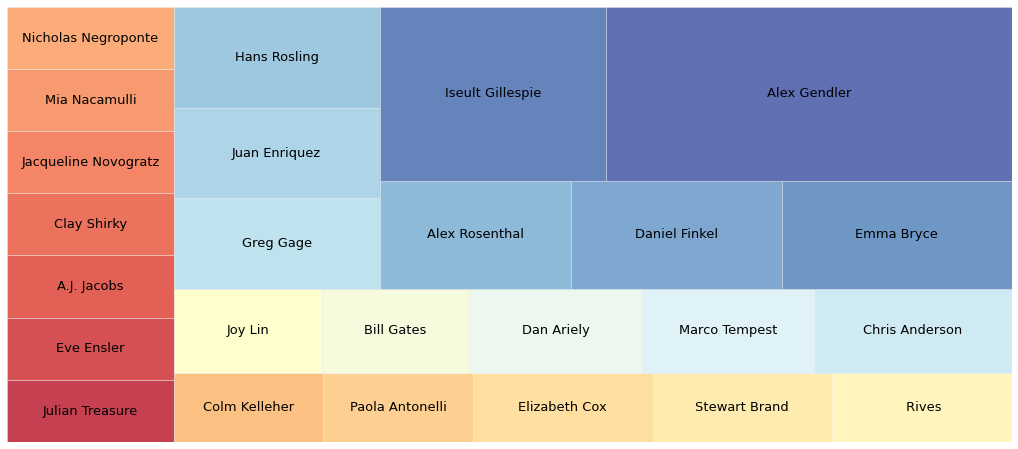

In [210]:
# storing the counts of top 25 speaker in a dataframe
speaker_counts = pd.DataFrame(
    df.speaker_1.value_counts().sort_values()) 


# storing the labels and values individually for tree map
a = speaker_counts.tail(25).index.tolist()
d = speaker_counts.tail(25).values.flatten().tolist()  #using tail because its sorted in ascending order

#plotting the tree map with squarify library
plt.rcParams['figure.figsize'] = [18, 8]
plt.style.use('ggplot')

squarify.plot(sizes=d,label=a, alpha=.8, 
              text_kwargs={'fontsize': 13, 'color': 'black'},
              color=sns.color_palette("RdYlBu", len(d)))

plt.axis("off")
plt.show()

Alex Gendler and Iseult Gillespie have the most number of occurance in events as speaker

### Percentage Repeatation of speakers

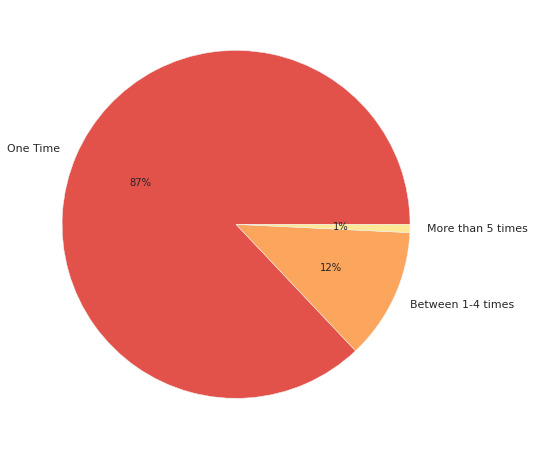

In [211]:
# plotting pie chart for the percentage of speakers who repeated in ted shows

only1 = len(speaker_counts[speaker_counts['speaker_1']==1]) # counts of appearing only 1 times
less_than5 = len(speaker_counts[(speaker_counts['speaker_1']>1) & (speaker_counts['speaker_1']<5)]) # counts of appearing between 1 and 4  times
more_than5 = len(speaker_counts[speaker_counts['speaker_1']>=5]) # counts of appearing more than 5 times
total = len(speaker_counts) # total length of unique speakers

data = [round(only1/total*100,2), round(less_than5/total*100,2), round(more_than5/total*100,2)] # calculating the percentage of counts
labels = ['One Time', 'Between 1-4 times', 'More than 5 times'] # lable names
colors = sns.color_palette('Spectral')[0:5]

plt.pie(data, labels = labels, colors = colors, autopct='%.00f%%')
plt.show()

We see that only 1% of total speakers were repeated more than 5 times, but there's a descent range for speakers who are reappeared between 1-4 times that is 12%, but yes 87% of speakers are new for event.

### Analysing top 20 Speakers with highest average views

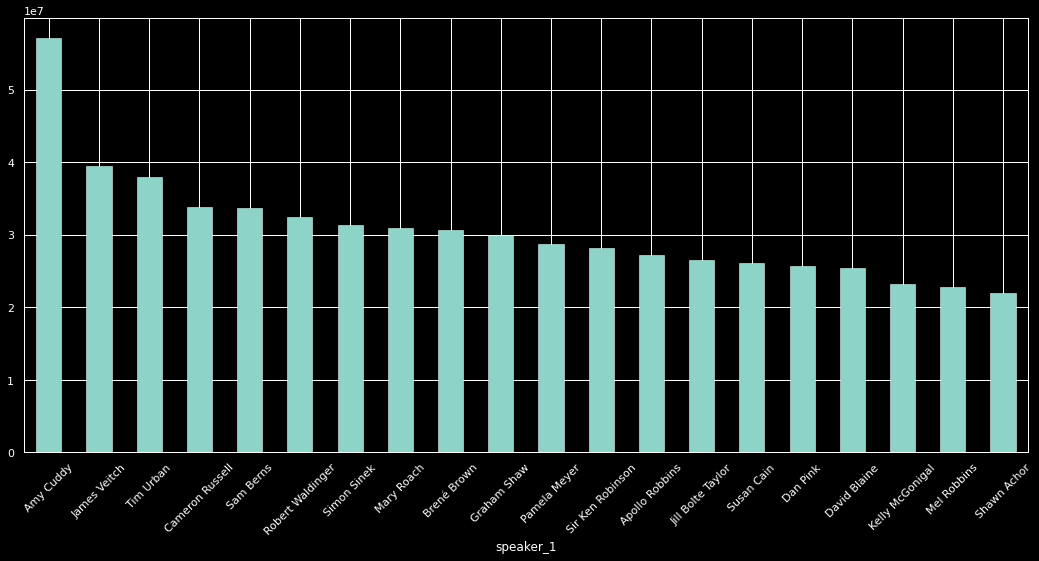

In [212]:
# Plotting the top 20 speakers with most views from the given data 
plt.style.use('dark_background') # changing the style to dark 
df.groupby('speaker_1')['views'].mean().sort_values(ascending=False).head(20).plot(kind='bar') #grouping by the speaker with their mean to find top 20 
plt.xticks(rotation=45) 
plt.show()

Amy Cuddy has the highest views for its video, can be various reasons for this, popularity must be the top.

### Popular occupations with their views and comments

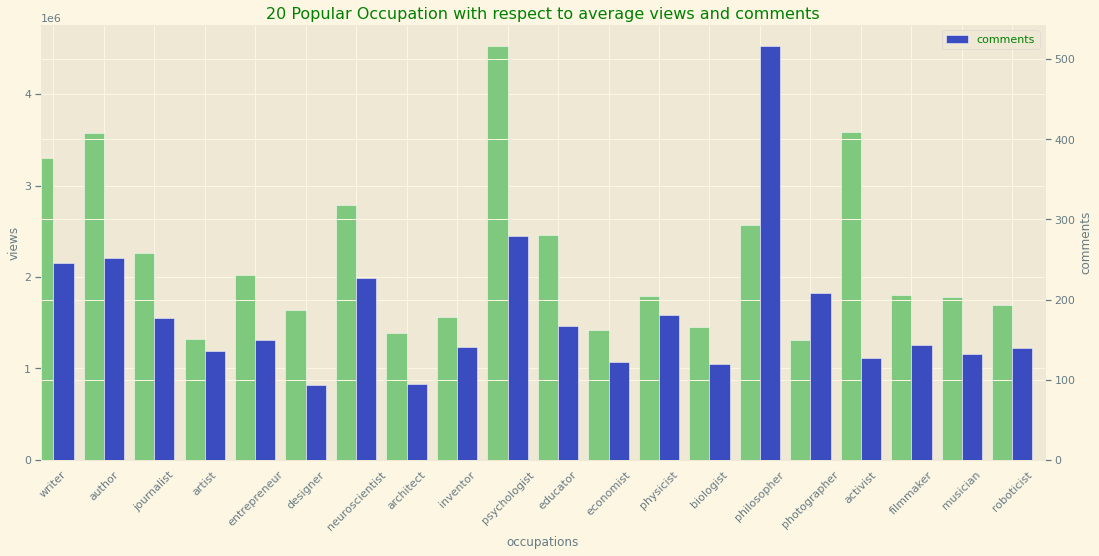

In [213]:
# grouping the occupation and applying some aggregate functions like count, mean and storing in temp dataframe

occupation_df = df.groupby('occupations').agg(
    {'occupations':'count', 'views':'mean', 'comments':'mean' }).fillna(0) # filling the NaN with 0 for now

# changing the column name as it has duplicate column name
occupation_df.columns.values[0] = "counts"

# storing only top 20 in the dataframe by popularity
occupation_df = occupation_df.sort_values('counts', ascending=False).head(20)
occupation_df.drop('counts', axis=1, inplace=True)


# started plotting
plt.style.use('Solarize_Light2') # setting the theme of matplotlib
plt.rcParams.update({'text.color': "green"}) # formatting the colors

ax = plt.figure().add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

occupation_df.views.plot(kind='bar', ax=ax,colormap='Accent', width=width, position=1, rot= 45) # the frist axis bar chart of views with y on left side 
occupation_df.comments.plot(kind='bar', ax=ax2, colormap='coolwarm', width=width, position=0) # second axis bar chart of comments with y axis on right side
ax.set_ylabel('views')
ax2.set_ylabel('comments')
plt.title('20 Popular Occupation with respect to average views and comments')
plt.legend()
plt.show()

there were some insights we got from here are, 
* Highest viewed profession is **Psychologist** followed by **activist** and **author**
* most comments is on **Philosopher**, maybe asking questions in comments is the reason.


### Average Views and comments on Yearly basis and Average Duration of video over years

[]

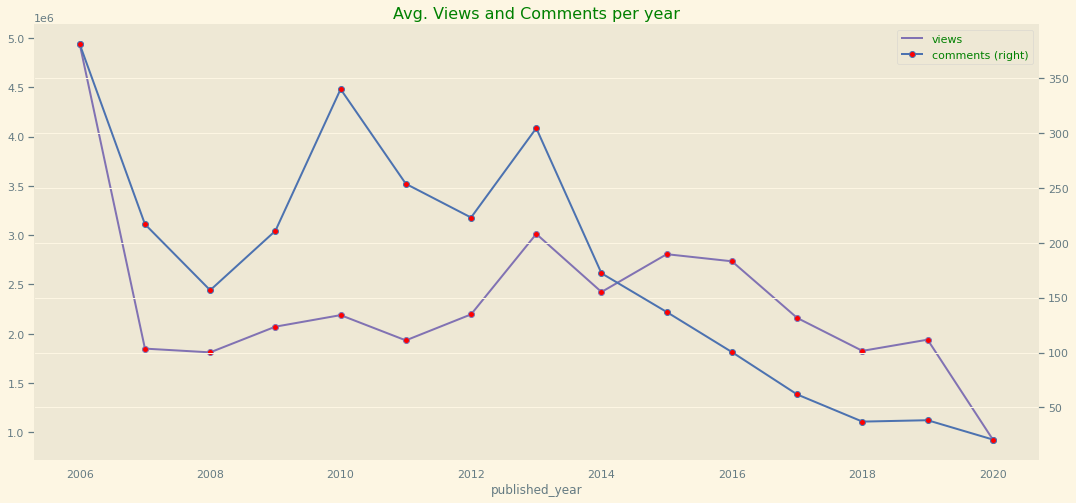

In [214]:
# Creating a column of publishing year from the published date column

df['published_year'] = pd.DatetimeIndex(df['published_date']).year

# plotting the two plots for avrage views and average comments for each year
df.groupby('published_year')['views'].mean().plot(marker = 'o', markerfacecolor = 'red', color='m', legend=True)
df.groupby('published_year')['comments'].mean().plot(secondary_y=True, marker = 'o', markerfacecolor = 'red', color= 'b', legend=True)
plt.title('Avg. Views and Comments per year')

plt.plot()

Average Views are higher in the statnig years, but now they are decreased, also the comments are somewhat consistent till 2014 then they started declining.

[]

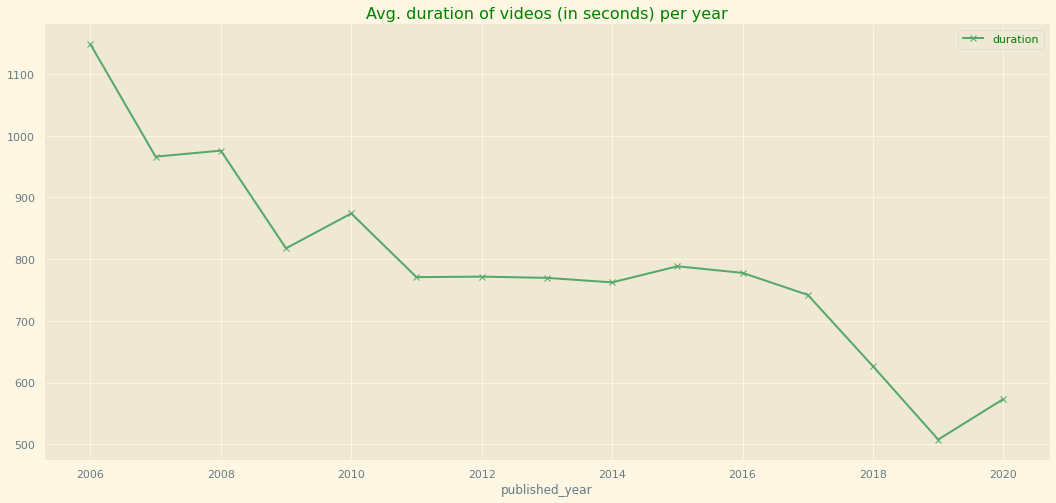

In [215]:
# Plotting the Average duration thorught the years of ted talks

df.groupby('published_year')['duration'].mean().plot(
                    marker = 'x', markerfacecolor = 'red', color='g', legend=True)

plt.title('Avg. duration of videos (in seconds) per year')
plt.plot()

We see that average duration for videos are slowly decreasing maybe because of  the attention span of humans are going down.

### Views with respect to type of Events

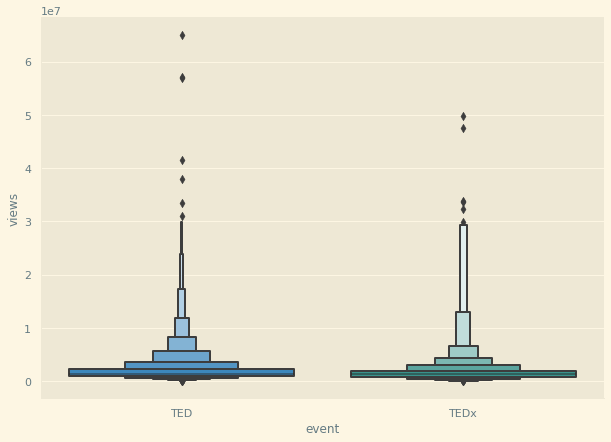

In [216]:
# plotting a boxen plot, a detailed version of box plot
sns.catplot(data=df, x="event", y="views", kind='boxen', height = 6.25, aspect=11/8)

We can conclude that Both events has similarity in views but TEDx has slightly wide area between 1.5 and 3 meaning there has more no. of views compare to TED. 

### Average views based on available languages

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


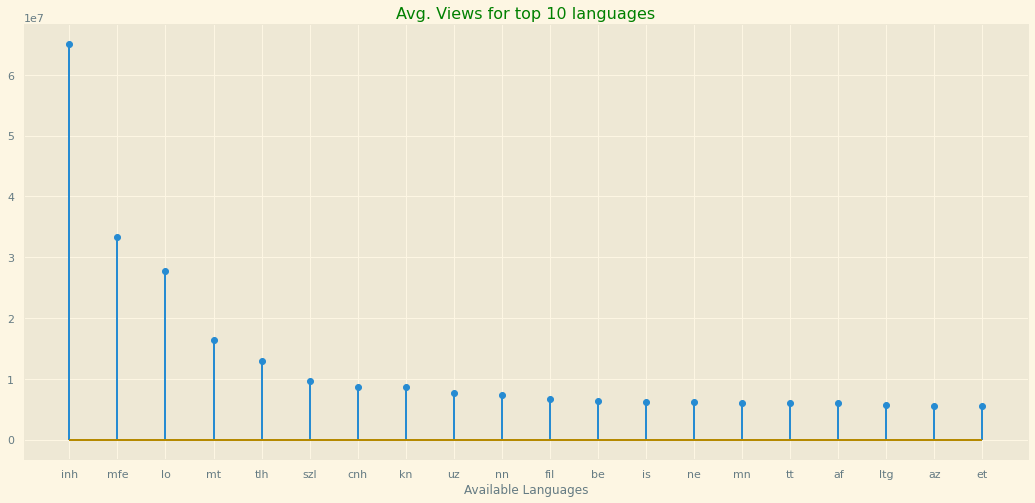

In [217]:
# calculating the average views per language available using the explode function to get all values from list of languages.

avb_lang = df.explode('available_lang').groupby(
    'available_lang')['views'].mean().sort_values(ascending=False).head(20)

# storing labels and values in differnet variable for the plotting purpose
label = avb_lang.index.tolist()
val = avb_lang.values.tolist()

plt.stem(label,val)
plt.title('Avg. Views for top 10 languages')
plt.xlabel('Available Languages')
plt.show()

**inh**, **mfe**, **lo** are the 3 top most languages with highest average views

### The most frequent topics in the show

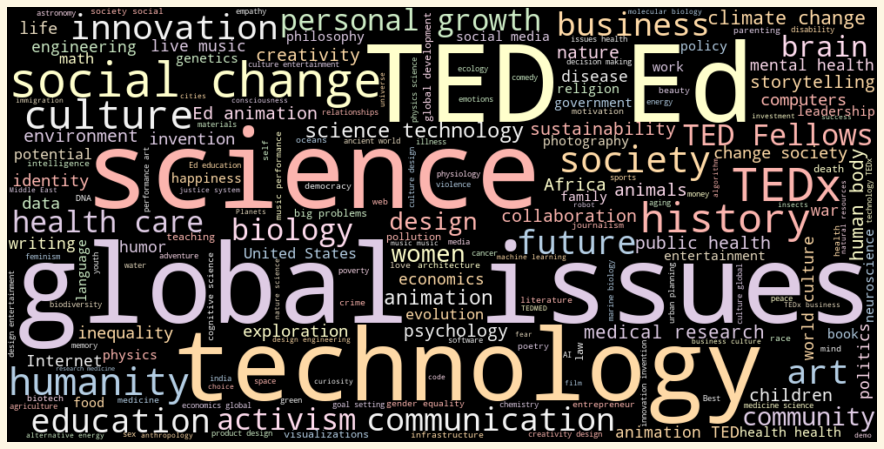

In [218]:
# adding all the words in topics into the text as a string to pass in the word cloud.

text = '+'.join(df['topics'].explode())

# creating a wordclound object and assigning paramenters
wordcloud = WordCloud(width = 1000, height = 500, 
                      random_state=1, background_color="black",
                      colormap="Pastel1")

# generating word clound by its object
wordcloud.generate(text)

# Display the generated Word Cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

TED-Ed, Science, Gloabal Issues, Technology are among the most frequent topics for show followed by plenty of others.

#### Lets see which topic has highest views

In [219]:
# getting the 10 max viewed topics in a series
top_topic = df.explode('topics').groupby(
    'topics')['views'].max().sort_values(
        ascending=False).head(10)

# converting the series to list
top_topic = top_topic.index.tolist()

print(f'Top 10 highest viewed topics are {top_topic}.')

Top 10 highest viewed topics are ['creativity', 'culture', 'dance', 'parenting', 'teaching', 'education', 'children', 'self', 'success', 'science'].


### Distribution of Views and Comments and duration 


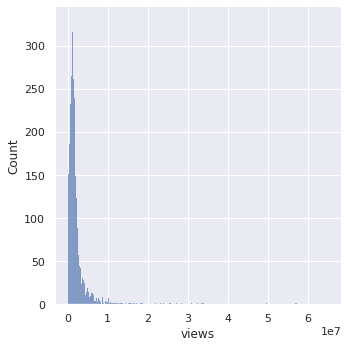

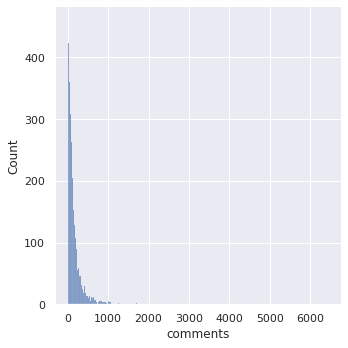

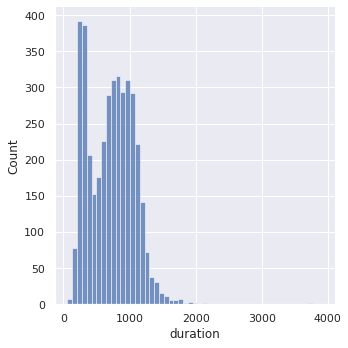

In [220]:
# keeping numerical features in a list
num_col = ['views', 'comments', 'duration']

sns.set(rc={'figure.figsize':(9,7)})

#plotting the distribution for each feature in list
for i in num_col:
  sns.displot(df[i])    #height=6.27, aspect=11.7/8.27
  plt.xlabel(i)
  plt.show()


**Views** and **Comments** are right skewed curves 

### Relation with Dependent variable

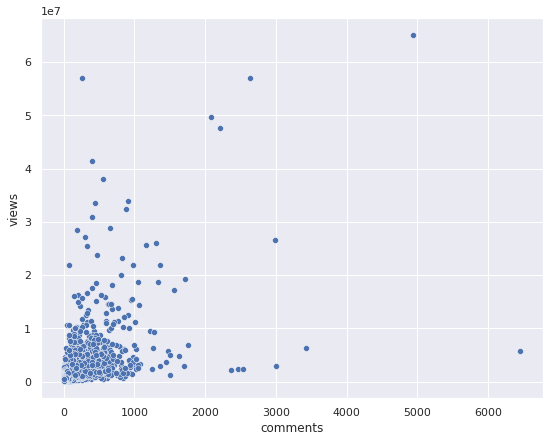

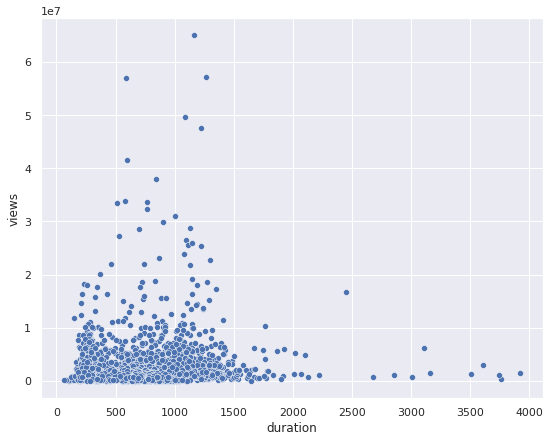

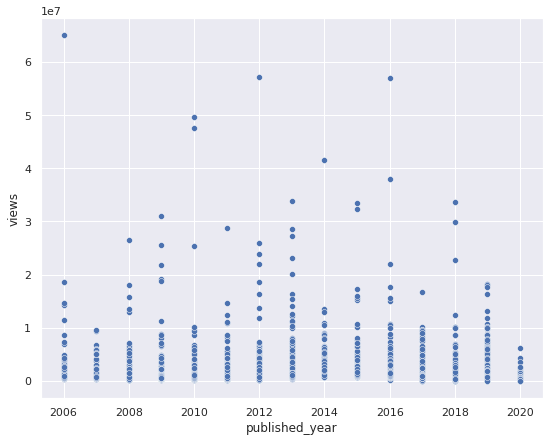

In [221]:
# scatterplot for checking the relation with our dependent variable "Views"


for i in ['comments', 'duration', 'published_year']:
  sns.scatterplot(x=i, y = 'views', data=df)
  plt.show()

There has been not a clear relation between these variable with target variable, but feature engineering may help to get a good understanding of hidden relations.

## Data Cleaning, Outliers and Null/Missing value treatment 

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4005 entries, 1 to 62794
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           4005 non-null   object        
 1   speaker_1       4005 non-null   object        
 2   occupations     3483 non-null   object        
 3   about_speakers  3502 non-null   object        
 4   views           4005 non-null   int64         
 5   recorded_date   4004 non-null   datetime64[ns]
 6   published_date  4005 non-null   datetime64[ns]
 7   event           4005 non-null   object        
 8   native_lang     4005 non-null   object        
 9   available_lang  4005 non-null   object        
 10  comments        3350 non-null   float64       
 11  duration        4005 non-null   int64         
 12  topics          4005 non-null   object        
 13  related_talks   4005 non-null   object        
 14  url             4005 non-null   object        
 15  des

### Removing records with 0 views and removing the unnecessary features frame dataframe

In [223]:
# only considering the views which are non zero for our modeling
df = df[df.views != 0]

# removnig unnecessasy coloumns
unimportant_col = ['title', 'speaker_1' ,'about_speakers', 'url', 'native_lang', 'description']
df = df.drop(unimportant_col, axis=1)

df.head(3)

,occupations,views,recorded_date,published_date,event,available_lang,comments,duration,topics,related_talks,transcript,published_year
talk_id,,,,,,,,,,,,
1,climate advocate,3523392,2006-02-25,2006-06-27,TED,"[ar, bg, cs, de, el, en, es, fa, fr, fr-ca, gl...",272.000000,977,"[alternative energy, cars, climate change, cul...","{243: 'New thinking on the climate crisis', 54...","Thank you so much, Chris. And it's truly a gre...",2006
92,global health expert; data visionary,14501685,2006-02-22,2006-06-27,TED,"[ar, az, bg, bn, bs, cs, da, de, el, en, es, e...",628.000000,1190,"[Africa, Asia, Google, demo, economics, global...","{2056: ""Own your body's data"", 2296: 'A visual...","About 10 years ago, I took on the task to teac...",2006
7,technology columnist,1920832,2006-02-24,2006-06-27,TED,"[ar, bg, de, el, en, es, fa, fr, he, hr, hu, i...",124.000000,1286,"[computers, entertainment, interface design, m...","{1725: '10 top time-saving tech tips', 2274: '...","(Music: ""The Sound of Silence,"" Simon & Garfun...",2006


Removed some unimportant categorical column and removed the native language because "available_lang" is presented for our feature engineering task.

# Null Value Treatment

Filling Nulls of **Occupation** with "others"

In [224]:
# using 'Others
df = df.fillna({"occupations": 'other'})

Null of **recorded_date**

Since there's only 1 value that is missing in recored_date column, i can fill it with help of related talk's averge time to reach given views.

In [225]:
df[df['recorded_date'].isna()]  # checking the related talk id from the null record

,occupations,views,recorded_date,published_date,event,available_lang,comments,duration,topics,related_talks,transcript,published_year
talk_id,,,,,,,,,,,,
56629,economist,1276272,NaT,2020-01-23,TEDx,"[en, es, fr, it, ko, pt, tr, vi, zh-cn, zh-tw]",20.000000,1039,"[global development, development, social chang...",{46582: 'Why governments should prioritize wel...,(In Maori: My mountain is Taupiri.) (Waikato i...,2020


In [226]:
df.loc[46582][['views','recorded_date', 'published_date']] # analysing the related id recorded and published date to get an idea

views                         2076985
recorded_date     2019-07-21 00:00:00
published_date    2019-07-29 00:00:00
Name: 46582, dtype: object

In [227]:
# fillng the date with the intuiton that this number of views can get in 4 days compare to related talks date
df = df.fillna({'recorded_date': pd.Timestamp('20200119')}) 

#### Usaing KNN imputer to fill Null values of **comments**

In [228]:
# using the numerical columns as the nerest neighbours for the model to impute null values
nn_data = ['views', 'comments', 'duration', 'published_year']

# as the scales vary in different featurs, it create problem for KNN to calculate distance, so standardise the values is must. 
scaler = MinMaxScaler()

# define imputer
imputer = KNNImputer()

#fitting the model
imputer.fit(scaler.fit_transform(df[nn_data]))

# transform the dataset
df[nn_data] = imputer.transform(scaler.fit_transform(df[nn_data]))

#again applying inverse_transform on the data
df[nn_data] = scaler.inverse_transform(df[nn_data])

### Outlier treatment for numerical columns

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 62784
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   occupations     3999 non-null   object        
 1   views           3999 non-null   float64       
 2   recorded_date   3999 non-null   datetime64[ns]
 3   published_date  3999 non-null   datetime64[ns]
 4   event           3999 non-null   object        
 5   available_lang  3999 non-null   object        
 6   comments        3999 non-null   float64       
 7   duration        3999 non-null   float64       
 8   topics          3999 non-null   object        
 9   related_talks   3999 non-null   object        
 10  transcript      3999 non-null   object        
 11  published_year  3999 non-null   float64       
dtypes: datetime64[ns](2), float64(4), object(6)
memory usage: 535.2+ KB


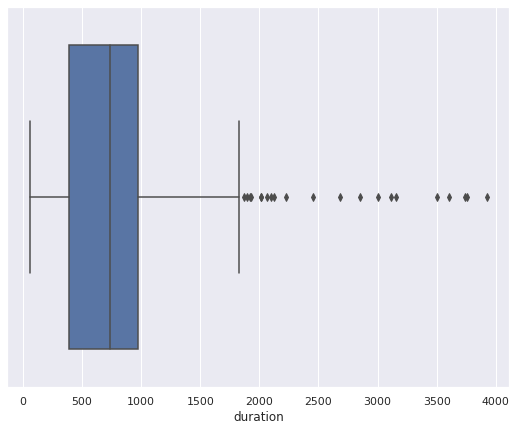

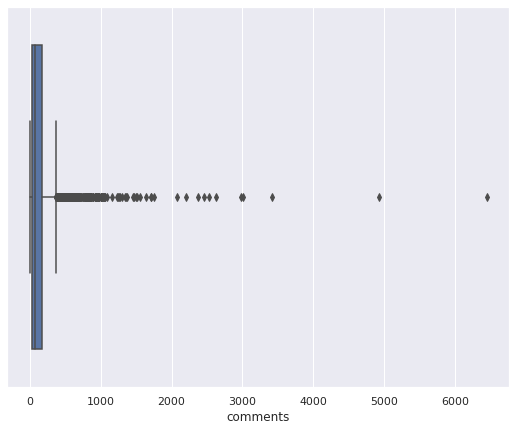

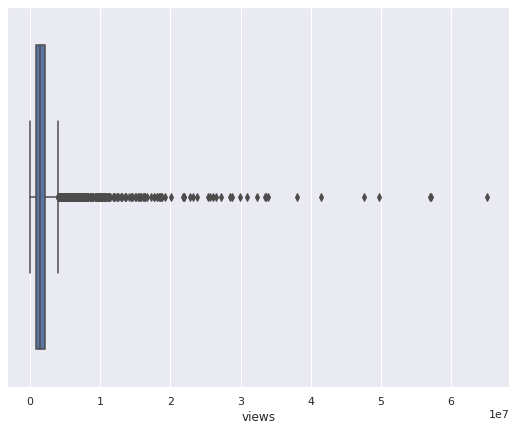

In [230]:
# boxplot for outliers for numerical column
for i in ['duration', 'comments', 'views']:
  sns.boxplot(x = i, data=df)
  plt.show()


* Logically speaking, we dont need to remove these values, because popular videos may have more comments and views and some videos may have long duration.

## Feature engineering

#### **Occupations** is important for views so, we assign the weight to each occupation as per their contribution in average views.

In [232]:
# assigning the rank, minimum number is for the least important and maximum is for the highest average viewed occupation
weight_df = df.groupby('occupations')['views'].mean().sort_values().rank().reset_index() # rank method is used on groupby of average of occupations

# merging the rank into the original dataframe
df = df.merge(weight_df, on='occupations', how='left').rename(columns = {'views_x': 'views' ,'views_y': 'weighted_occupation'})


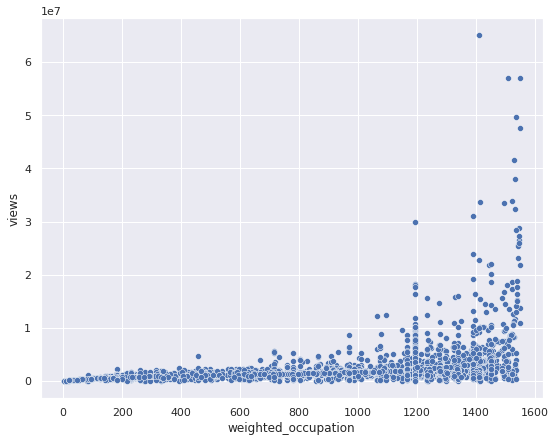

In [235]:
# scatter plot for new variable 
sns.scatterplot(x='weighted_occupation', y='views', data=df)

In [ ]:
df.head()